In [1]:
import pandas as pd

# 1. Load the CSV files
account_district = pd.read_csv(r'C:\Users\andrew.dilley\development\URGS\AccountDistrict2024.csv')
urgs_account     = pd.read_csv(r'C:\Users\andrew.dilley\development\URGS\URGS_account.csv')

# 2. Display their shapes and columns
print("AccountDistrict2024.csv →", account_district.shape)
print("Columns:", account_district.columns.tolist(), "\n")
print("URGS_account.csv →", urgs_account.shape)
print("Columns:", urgs_account.columns.tolist(), "\n")

# 3. Show info (dtypes, non-nulls)
print("=== AccountDistrict2024.csv info ===")
account_district.info()
print("\n=== URGS_account.csv info ===")
urgs_account.info()

# 4. Peek at the first few rows
print("\n=== AccountDistrict2024.csv head ===")
display(account_district.head())
print("\n=== URGS_account.csv head ===")
display(urgs_account.head())

# 5. Descriptive statistics
print("\n=== AccountDistrict2024.csv describe ===")
display(account_district.describe(include='all'))
print("\n=== URGS_account.csv describe ===")
display(urgs_account.describe(include='all'))


AccountDistrict2024.csv → (56102, 3)
Columns: ['pk_district', 'pk_account', 'description'] 

URGS_account.csv → (1451, 4)
Columns: ['pk_account', 'amount', 'description', 'evt_datetime'] 

=== AccountDistrict2024.csv info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56102 entries, 0 to 56101
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pk_district  56102 non-null  int64 
 1   pk_account   56102 non-null  int64 
 2   description  56102 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB

=== URGS_account.csv info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pk_account    1451 non-null   int64  
 1   amount        1174 non-null   float64
 2   description   1450 non-null   object 
 3   evt_datetime  1451 non-null   object 
dtypes: float64(

,pk_district,pk_account,description
0,52,30097144,Warrnambool
1,93,30028490,Portland
2,52,10004000,Warrnambool
3,7,30030924,Hamilton
4,32,10017963,Koroit



=== URGS_account.csv head ===


,pk_account,amount,description,evt_datetime
0,30038843,500.0,URGs Application - Successful - FC2017/07269,27/07/2017
1,30037503,NaN,URGs Application - Successful - FC2017/07959,16/08/2017
2,30018280,NaN,URGs Application - Successful - FC2017/07960,16/08/2017
3,30082945,500.0,URGs Application - Successful - FC2017/07961,16/08/2017
4,30035451,500.0,URGs Application - Successful - FC2017/08215,23/08/2017



=== AccountDistrict2024.csv describe ===


,pk_district,pk_account,description
count,56102.000000,5.610200e+04,56102
unique,NaN,NaN,47
top,NaN,NaN,Warrnambool
freq,NaN,NaN,22636
mean,48.610549,2.272047e+07,NaN
std,28.690859,9.654905e+06,NaN
min,1.000000,1.000001e+07,NaN
25%,26.000000,1.001541e+07,NaN
50%,52.000000,3.002464e+07,NaN
75%,52.000000,3.005104e+07,NaN



=== URGS_account.csv describe ===


,pk_account,amount,description,evt_datetime
count,1.451000e+03,1174.000000,1450,1451
unique,NaN,NaN,1107,384
top,NaN,NaN,URGs Application - Successful,16/10/2024
freq,NaN,NaN,177,37
mean,2.516962e+07,433.352479,NaN,NaN
std,8.613523e+06,202.562486,NaN,NaN
min,1.000022e+07,17.570000,NaN,NaN
25%,3.000216e+07,225.450000,NaN,NaN
50%,3.003650e+07,471.270000,NaN,NaN
75%,3.008626e+07,650.000000,NaN,NaN


In [5]:
print(merged)

      pk_account    debt                                    description_x  \
0       30038843  500.00     URGs Application - Successful - FC2017/07269   
1       30037503     NaN     URGs Application - Successful - FC2017/07959   
2       30018280     NaN     URGs Application - Successful - FC2017/07960   
3       30082945  500.00     URGs Application - Successful - FC2017/07961   
4       30035451  500.00     URGs Application - Successful - FC2017/08215   
...          ...     ...                                              ...   
1446    30031896  650.00  URGS Application Successful Letter FC2024/19345   
1447    30033079  196.45  URGS Application Successful Letter FC2024/19348   
1448    30035003   31.64  URGS Application Successful Letter FC2024/19355   
1449    30036872  650.00  URGS Application Successful Letter FC2024/19356   
1450    30055469  650.00  URGS Application Successful Letter FC2024/19360   

       urgs_date     description_y  
0     27/07/2017  Tullich Pipeline  
1

In [6]:
import pandas as pd

# 1. Load the CSVs
account_district = pd.read_csv(r'C:\Users\andrew.dilley\development\URGS\AccountDistrict2024.csv')
urgs_account     = pd.read_csv(r'C:\Users\andrew.dilley\development\URGS\URGS_account.csv')

# 2. Rename description columns
account_district.rename(columns={'description': 'district_description'}, inplace=True)
urgs_account.rename(columns={'description': 'letter_description'}, inplace=True)

# 3. Merge on pk_account to bring in district_description
merged = pd.merge(
    urgs_account, 
    account_district[['pk_account', 'district_description']],
    on='pk_account',
    how='left'
)

# 4. Rename amount and evt_datetime
merged.rename(columns={
    'amount': 'debt',
    'evt_datetime': 'urgs_date'
}, inplace=True)

# 5. Create the new DataFrame
new_df = merged[['district_description', 'pk_account', 'debt', 'urgs_date']]

# 6. Inspect the result
print("new_df shape:", new_df.shape)
display(new_df.head())


new_df shape: (1451, 4)


,district_description,pk_account,debt,urgs_date
0,Tullich Pipeline,30038843,500.0,27/07/2017
1,Coleraine,30037503,NaN,16/08/2017
2,Heywood,30018280,NaN,16/08/2017
3,Simpson,30082945,500.0,16/08/2017
4,Hamilton,30035451,500.0,23/08/2017


In [7]:
# Drop NaN debts and convert dates
clean_df = new_df.dropna(subset=['debt']).copy()
clean_df['urgs_date'] = pd.to_datetime(clean_df['urgs_date'])

# Inspect
print("Cleaned DataFrame shape:", clean_df.shape)
print(clean_df.dtypes)
display(clean_df.head())


Cleaned DataFrame shape: (1174, 4)
district_description            object
pk_account                       int64
debt                           float64
urgs_date               datetime64[ns]
dtype: object


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_60220\2389167201.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  clean_df['urgs_date'] = pd.to_datetime(clean_df['urgs_date'])


,district_description,pk_account,debt,urgs_date
0,Tullich Pipeline,30038843,500.00,2017-07-27
3,Simpson,30082945,500.00,2017-08-16
4,Hamilton,30035451,500.00,2017-08-23
5,NaN,30079599,500.00,2017-08-23
6,Portland,30084188,422.12,2017-08-23


In [9]:
print("=== clean_df info ===")
clean_df.info()

print("\n=== clean_df head ===")
display(clean_df.head())

print("\n=== clean_df describe ===")
display(clean_df.describe(include='all'))


=== clean_df info ===
<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 0 to 1450
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   district_description  1049 non-null   object        
 1   pk_account            1174 non-null   int64         
 2   debt                  1174 non-null   float64       
 3   urgs_date             1174 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 45.9+ KB

=== clean_df head ===


,district_description,pk_account,debt,urgs_date
0,Tullich Pipeline,30038843,500.00,2017-07-27
3,Simpson,30082945,500.00,2017-08-16
4,Hamilton,30035451,500.00,2017-08-23
5,NaN,30079599,500.00,2017-08-23
6,Portland,30084188,422.12,2017-08-23



=== clean_df describe ===


,district_description,pk_account,debt,urgs_date
count,1049,1.174000e+03,1174.000000,1174
unique,32,NaN,NaN,NaN
top,Warrnambool,NaN,NaN,NaN
freq,363,NaN,NaN,NaN
mean,NaN,2.498882e+07,433.352479,2022-01-25 09:21:46.303236864
min,NaN,1.000022e+07,17.570000,2017-07-27 00:00:00
25%,NaN,1.002210e+07,225.450000,2020-05-27 00:00:00
50%,NaN,3.003545e+07,471.270000,2022-05-23 00:00:00
75%,NaN,3.008589e+07,650.000000,2023-12-11 00:00:00
max,NaN,3.011936e+07,854.510000,2024-12-17 00:00:00


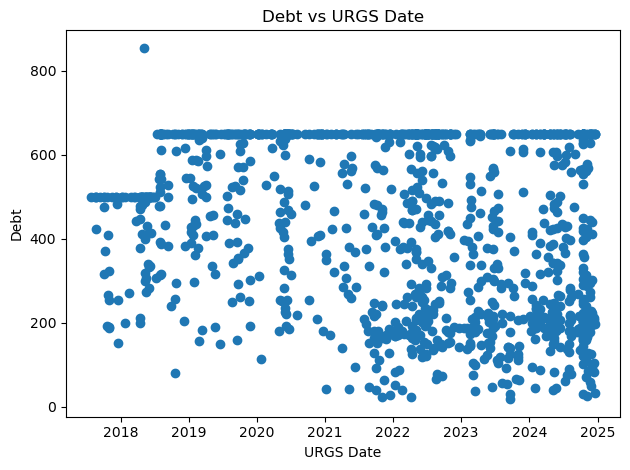

In [11]:
import matplotlib.pyplot as plt

# 1. Rename clean_df to plot_df
plot_df = clean_df.copy()

# 2. Scatter plot of debt vs URGS date
plt.figure()
plt.scatter(plot_df['urgs_date'], plot_df['debt'])
plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date')
plt.tight_layout()
plt.show()


In [12]:
# 1. Group by district and count
records_per_district = clean_df.groupby('district_description') \
                               .size() \
                               .reset_index(name='record_count')

# 2. Display the result
records_per_district



,district_description,record_count
0,Allansford,9
1,Balmoral,3
2,Camperdown,61
3,Camperdown Rural,6
4,Caramut,1
5,Carpendeit Water Works,6
6,Casterton,39
7,Cobden Urban,15
8,Cobden Water Works,3
9,Coleraine,32


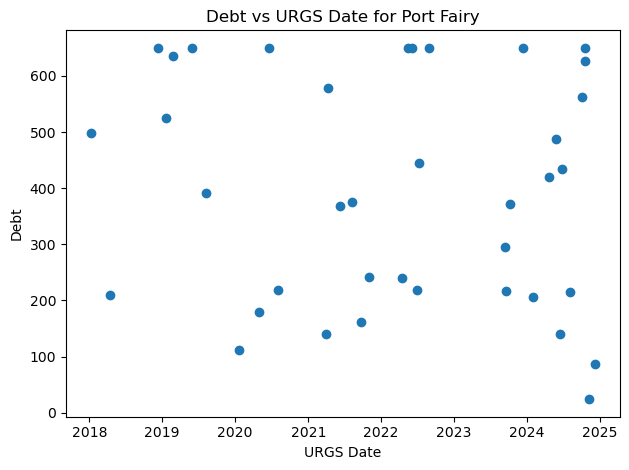

In [13]:
import matplotlib.pyplot as plt

# 1. Filter for Port Fairy
portfairy_df = clean_df[clean_df['district_description'] == 'Port Fairy']

# 2. Scatter plot
plt.figure()
plt.scatter(portfairy_df['urgs_date'], portfairy_df['debt'])
plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Port Fairy')
plt.tight_layout()
plt.show()


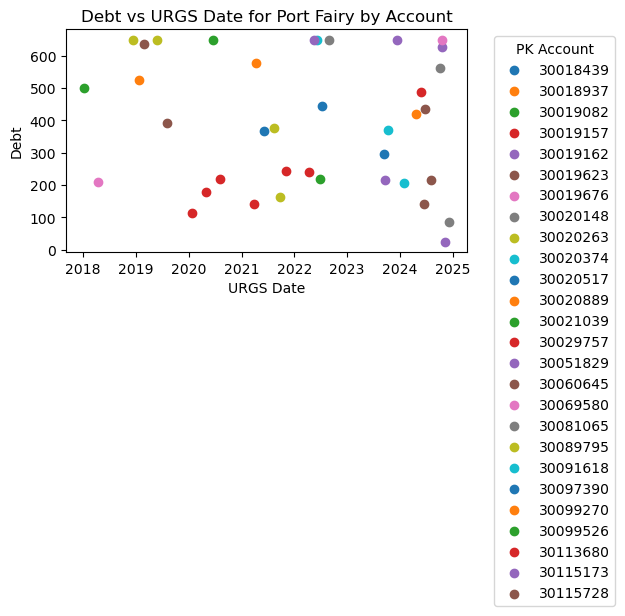

In [14]:
import matplotlib.pyplot as plt

# Filter for Port Fairy
portfairy_df = clean_df[clean_df['district_description'] == 'Port Fairy']

plt.figure()
for account, group in portfairy_df.groupby('pk_account'):
    plt.scatter(group['urgs_date'], group['debt'], label=account)
plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Port Fairy by Account')
plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
from IPython.display import display

# 1. Aggregate and count records per account, then sort descending
account_counts = (
    clean_df
    .groupby('pk_account')
    .size()
    .reset_index(name='record_count')
    .sort_values('record_count', ascending=False)
)

# 2. Display the result
display(account_counts)


,pk_account,record_count
58,10006969,8
290,30025210,6
375,30035003,6
188,10022099,6
239,30019157,5
...,...,...
358,30033675,1
359,30033676,1
360,30033822,1
361,30033833,1


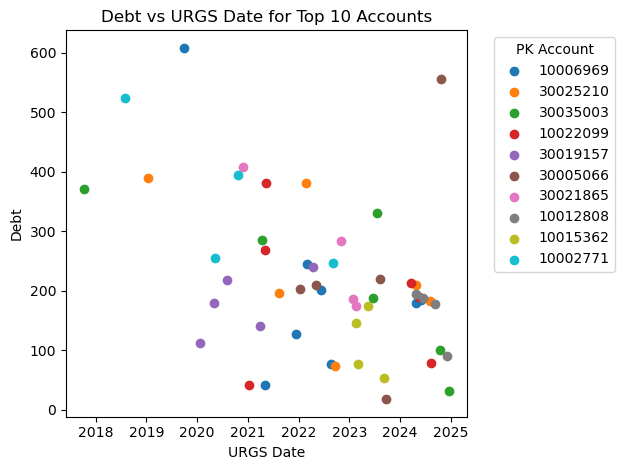

In [18]:
import matplotlib.pyplot as plt

# 1. Compute top 10 accounts by number of records
account_counts = (
    clean_df
    .groupby('pk_account')
    .size()
    .reset_index(name='record_count')
    .sort_values('record_count', ascending=False)
)
top10_accounts = account_counts.head(10)['pk_account'].tolist()

# 2. Filter for these top 10 accounts
top10_df = clean_df[clean_df['pk_account'].isin(top10_accounts)]

# 3. Plot with separate colors
cmap = plt.get_cmap('tab10', len(top10_accounts))
plt.figure()
for idx, account in enumerate(top10_accounts):
    grp = top10_df[top10_df['pk_account'] == account]
    plt.scatter(grp['urgs_date'], grp['debt'], label=account, color=cmap(idx))

plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Top 10 Accounts')
plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


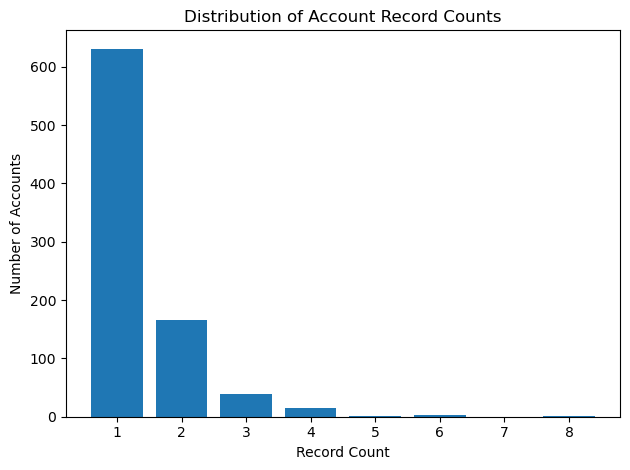

In [19]:
import matplotlib.pyplot as plt

# 1. Calculate how many records each account has
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')

# 2. Count how many accounts fall into each record_count value
dist = account_counts['record_count'].value_counts().sort_index()

# 3. Plot the distribution
plt.figure()
plt.bar(dist.index, dist.values)
plt.xlabel('Record Count')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Account Record Counts')
plt.tight_layout()
plt.show()


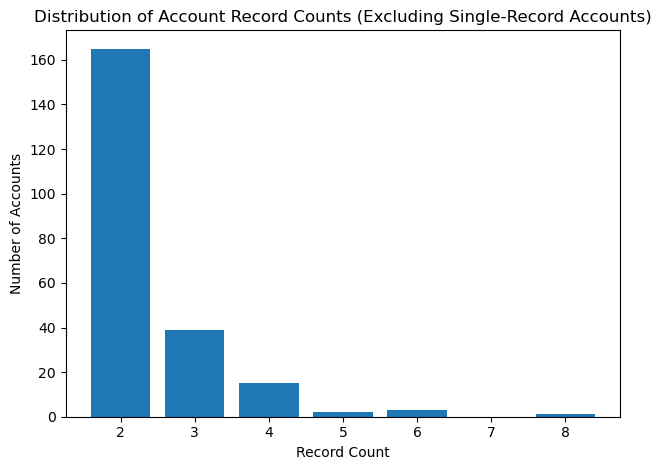

In [20]:
import matplotlib.pyplot as plt

# 1. Calculate record counts per account
account_counts = clean_df.groupby('pk_account') \
                         .size() \
                         .reset_index(name='record_count')

# 2. Exclude accounts with only 1 record
filtered_counts = account_counts[account_counts['record_count'] > 1]

# 3. Compute distribution of record counts
dist = filtered_counts['record_count'].value_counts().sort_index()

# 4. Plot bar chart
plt.figure()
plt.bar(dist.index, dist.values)
plt.xlabel('Record Count')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Account Record Counts (Excluding Single-Record Accounts)')
plt.tight_layout()
plt.show()


In [21]:
# 1. (Re)generate account_counts if needed
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')

# 2. Select accounts with 3 or 4 records
accounts_3_4 = account_counts[account_counts['record_count'].isin([3, 4])]

# 3. Filter the main DataFrame for these accounts
filtered_df_3_4 = clean_df[clean_df['pk_account'].isin(accounts_3_4['pk_account'])]

# 4. Display the results
print("Accounts with 3 or 4 records:")
display(accounts_3_4)

print("\nSample of the filtered data:")
display(filtered_df_3_4.head())


Accounts with 3 or 4 records:


,pk_account,record_count
11,10001308,3
12,10001487,3
14,10001558,3
22,10002771,4
31,10004195,4
41,10005316,3
47,10005838,3
62,10008520,4
64,10009420,3
70,10010284,4



Sample of the filtered data:


,district_description,pk_account,debt,urgs_date
27,Hamilton,30035441,500.00,2017-10-20
29,Warrnambool,30083114,409.10,2017-10-25
57,Coleraine,30037115,377.20,2018-04-17
58,Hamilton,30087318,200.00,2018-04-17
59,Camperdown,10021470,470.97,2018-04-17


In [22]:
# 1. Compute record counts per account
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')

# 2. Filter for accounts with 3 or 4 records
accounts_3_4 = account_counts[account_counts['record_count'].isin([3, 4])]

# 3. Subset the main DataFrame
filtered_df_3_4 = clean_df[clean_df['pk_account'].isin(accounts_3_4['pk_account'])]

# 4. Group by district and count
district_counts = (
    filtered_df_3_4
    .groupby('district_description')
    .size()
    .reset_index(name='record_count')
)

# 5. Display the result
from IPython.display import display
display(district_counts)


,district_description,record_count
0,Camperdown,9
1,Camperdown Rural,3
2,Coleraine,10
3,Dartmoor,3
4,Hamilton,21
5,Koroit,3
6,Merino,3
7,Port Fairy,9
8,Portland,23
9,Terang,8


In [29]:
print(filtered_df_3_4)

     district_description  pk_account    debt  urgs_date
27               Hamilton    30035441  500.00 2017-10-20
29            Warrnambool    30083114  409.10 2017-10-25
57              Coleraine    30037115  377.20 2018-04-17
58               Hamilton    30087318  200.00 2018-04-17
59             Camperdown    10021470  470.97 2018-04-17
...                   ...         ...     ...        ...
1435          Warrnambool    10009420  222.94 2024-12-04
1436          Warrnambool    10012808   89.98 2024-12-04
1438             Dartmoor    30041929   96.28 2024-12-04
1441             Hamilton    30065091  211.48 2024-12-12
1446             Hamilton    30031896  650.00 2024-12-17

[177 rows x 4 columns]


In [30]:
# Filter filtered_df_3_4 for Terang district
terang_3_4_df = filtered_df_3_4[filtered_df_3_4['district_description'] == 'Terang']

# Inspect the result
from IPython.display import display
print("Records in filtered_df_3_4 for Terang:")
display(terang_3_4_df)


Records in filtered_df_3_4 for Terang:


,district_description,pk_account,debt,urgs_date
609,Terang,10015820,163.40,2021-11-25
639,Terang,10015820,181.15,2022-02-16
688,Terang,10015820,171.10,2022-04-27
795,Terang,10015820,134.35,2022-08-01
924,Terang,10015362,146.10,2023-02-15
936,Terang,10015362,75.90,2023-03-06
972,Terang,10015362,174.22,2023-05-17
1056,Terang,10015362,52.92,2023-09-04


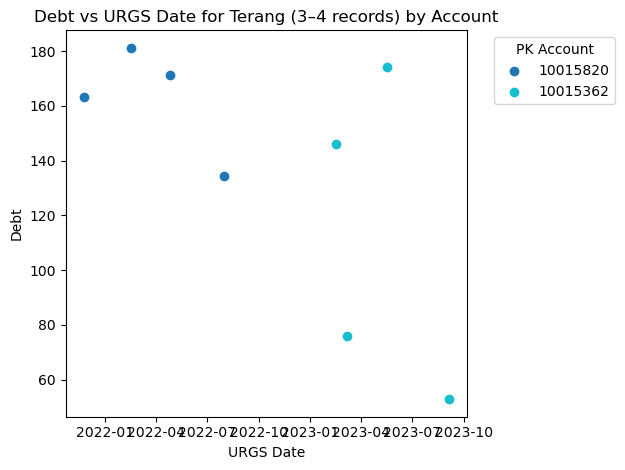

In [31]:
import matplotlib.pyplot as plt

# 1. Compute record counts and select accounts with 3 or 4 records
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')
filtered_accounts = account_counts[account_counts['record_count'].isin([3, 4])]['pk_account']

# 2. Filter for those accounts and for Terang district
terang_3_4_df = clean_df[
    clean_df['pk_account'].isin(filtered_accounts) &
    (clean_df['district_description'] == 'Terang')
]

# 3. Plot color‐coded scatter by account
accounts = terang_3_4_df['pk_account'].unique()
cmap = plt.get_cmap('tab10', len(accounts))

plt.figure()
for idx, acct in enumerate(accounts):
    grp = terang_3_4_df[terang_3_4_df['pk_account'] == acct]
    plt.scatter(grp['urgs_date'], grp['debt'], label=acct, color=cmap(idx))

plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Terang (3–4 records) by Account')
plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


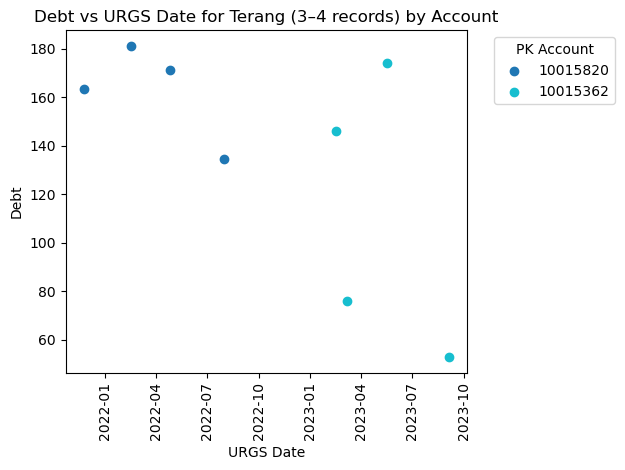

In [32]:
import matplotlib.pyplot as plt

# 1. Compute record counts and select accounts with 3 or 4 records
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')
filtered_accounts = account_counts[account_counts['record_count'].isin([3, 4])]['pk_account']

# 2. Filter for those accounts and for Terang district
terang_3_4_df = clean_df[
    clean_df['pk_account'].isin(filtered_accounts) &
    (clean_df['district_description'] == 'Terang')
]

# 3. Plot color‐coded scatter by account, with rotated x-labels
accounts = terang_3_4_df['pk_account'].unique()
cmap = plt.get_cmap('tab10', len(accounts))

plt.figure()
for idx, acct in enumerate(accounts):
    grp = terang_3_4_df[terang_3_4_df['pk_account'] == acct]
    plt.scatter(grp['urgs_date'], grp['debt'], label=acct, color=cmap(idx))

plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Terang (3–4 records) by Account')
plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


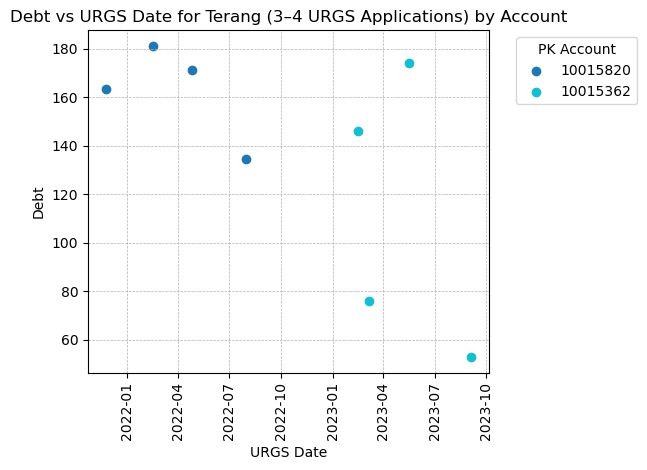

In [40]:
import matplotlib.pyplot as plt

# 1. Compute record counts and select accounts with 3 or 4 records
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')
filtered_accounts = account_counts[account_counts['record_count'].isin([3, 4])]['pk_account']

# 2. Filter for those accounts and for Terang district
terang_3_4_df = clean_df[
    clean_df['pk_account'].isin(filtered_accounts) &
    (clean_df['district_description'] == 'Terang')
]

# 3. Plot color-coded scatter by account, with rotated x-labels and light grid lines
accounts = terang_3_4_df['pk_account'].unique()
cmap = plt.get_cmap('tab10', len(accounts))

plt.figure()
for idx, acct in enumerate(accounts):
    grp = terang_3_4_df[terang_3_4_df['pk_account'] == acct]
    plt.scatter(grp['urgs_date'], grp['debt'], label=acct, color=cmap(idx))

plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Terang (3–4 URGS Applications) by Account')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add light horizontal and vertical grid lines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


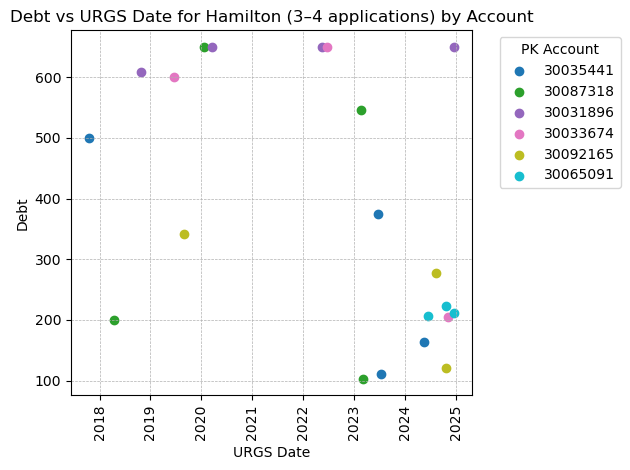

In [37]:
import matplotlib.pyplot as plt

# 1. Compute record counts and select accounts with 3 or 4 records
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')
filtered_accounts = account_counts[account_counts['record_count'].isin([3, 4])]['pk_account']

# 2. Filter for those accounts and for Terang district
terang_3_4_df = clean_df[
    clean_df['pk_account'].isin(filtered_accounts) &
    (clean_df['district_description'] == 'Hamilton')
]

# 3. Plot color-coded scatter by account, with rotated x-labels and light grid lines
accounts = terang_3_4_df['pk_account'].unique()
cmap = plt.get_cmap('tab10', len(accounts))

plt.figure()
for idx, acct in enumerate(accounts):
    grp = terang_3_4_df[terang_3_4_df['pk_account'] == acct]
    plt.scatter(grp['urgs_date'], grp['debt'], label=acct, color=cmap(idx))

plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Hamilton (3–4 applications) by Account')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add light horizontal and vertical grid lines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


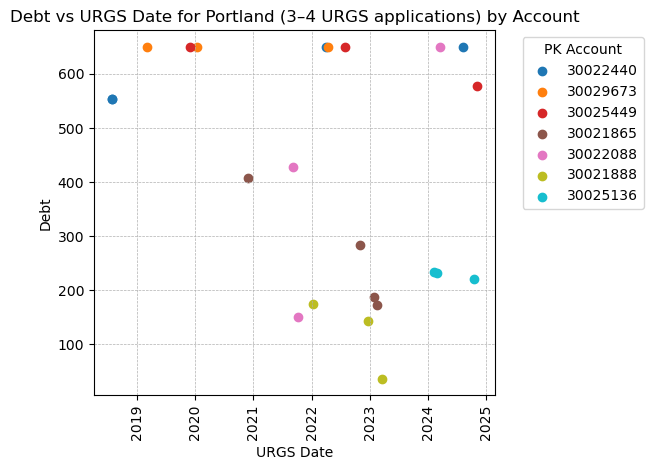

In [39]:
import matplotlib.pyplot as plt

# 1. Compute record counts and select accounts with 3 or 4 records
account_counts = clean_df.groupby('pk_account').size().reset_index(name='record_count')
filtered_accounts = account_counts[account_counts['record_count'].isin([3, 4])]['pk_account']

# 2. Filter for those accounts and for Terang district
terang_3_4_df = clean_df[
    clean_df['pk_account'].isin(filtered_accounts) &
    (clean_df['district_description'] == 'Portland')
]

# 3. Plot color-coded scatter by account, with rotated x-labels and light grid lines
accounts = terang_3_4_df['pk_account'].unique()
cmap = plt.get_cmap('tab10', len(accounts))

plt.figure()
for idx, acct in enumerate(accounts):
    grp = terang_3_4_df[terang_3_4_df['pk_account'] == acct]
    plt.scatter(grp['urgs_date'], grp['debt'], label=acct, color=cmap(idx))

plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date for Portland (3–4 URGS applications) by Account')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add light horizontal and vertical grid lines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.legend(title='PK Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


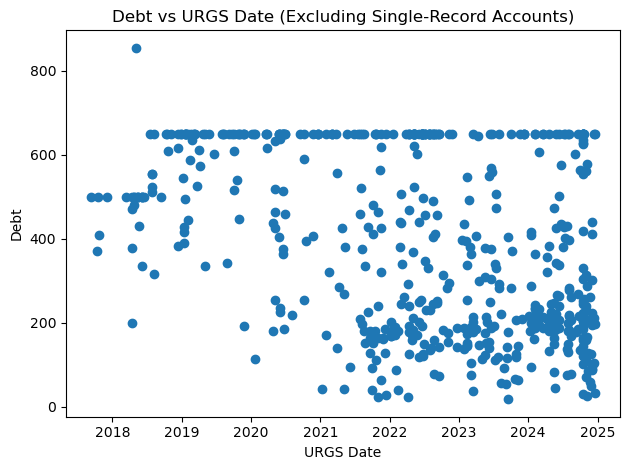

In [41]:
import matplotlib.pyplot as plt

# 1. Copy and filter out accounts with only one record
plot_df = clean_df.copy()
counts = plot_df['pk_account'].value_counts()
plot_df = plot_df[plot_df['pk_account'].isin(counts[counts > 1].index)]

# 2. Scatter plot of debt vs URGS date for the filtered set
plt.figure()
plt.scatter(plot_df['urgs_date'], plot_df['debt'])
plt.xlabel('URGS Date')
plt.ylabel('Debt')
plt.title('Debt vs URGS Date (Excluding Single-Record Accounts)')
plt.tight_layout()
plt.show()
